# ZOMATO BANGALORE DATASET EDA

### Data Description
* url : This feature contains the url of the restaurant on the Zomato website
* address : This feature contains the address of the restaurant in Bangalore
* name : This feature contains the name of the restaurant
* online_order : whether online ordering is available in the restaurant or not
* book_table : table book option available or not
* rate : contains the overall rating of the restaurant out of 5
* votes : contains total number of upvotes for the restaurant
* phone : contains the phone number of the restaurant
* location : contains the neighborhood in which the restaurant is located
* rest_type : restaurant type
* dish_liked : dishes people liked in the restaurant
* cuisines : food styles, separated by comma
* approx_cost(for two people) : contains the approximate cost of meal for two people
* reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
* menu_item : contains list of menus available in the restaurant
* listed_in(type) : type of meal
* listed_in(city) : contains the neighborhood in which the restaurant is located

In [10]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kaina\OneDrive\Desktop\zomato.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
# Clean the 'rate' column
df['rate'] = df['rate'].str.replace('/5', '').replace('NEW', None).replace('-', None).astype(float)

# Verify the changes
df['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
# Clean the 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Verify the changes
df['approx_cost(for two people)'].head()


0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

In [14]:
# Drop rows with missing 'rate' values
df = df.dropna(subset=['rate'])

# Check remaining missing values
df.isnull().sum()


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            814
location                           0
rest_type                        149
dish_liked                     18203
cuisines                          11
approx_cost(for two people)      247
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
# Drop rows with missing values in 'phone', 'rest_type', 'cuisines', and 'approx_cost(for two people)'
df = df.dropna(subset=['phone', 'rest_type', 'cuisines', 'approx_cost(for two people)'])

# Fill missing values in 'dish_liked' with a placeholder
df['dish_liked'] = df['dish_liked'].fillna('No information')

# Verify if there are any remaining missing values
df.isnull().sum()


url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40687 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          40687 non-null  object 
 1   address                      40687 non-null  object 
 2   name                         40687 non-null  object 
 3   online_order                 40687 non-null  object 
 4   book_table                   40687 non-null  object 
 5   rate                         40687 non-null  float64
 6   votes                        40687 non-null  int64  
 7   phone                        40687 non-null  object 
 8   location                     40687 non-null  object 
 9   rest_type                    40687 non-null  object 
 10  dish_liked                   40687 non-null  object 
 11  cuisines                     40687 non-null  object 
 12  approx_cost(for two people)  40687 non-null  float64
 13  reviews_list         

UNIVARIATE ANALYSIS

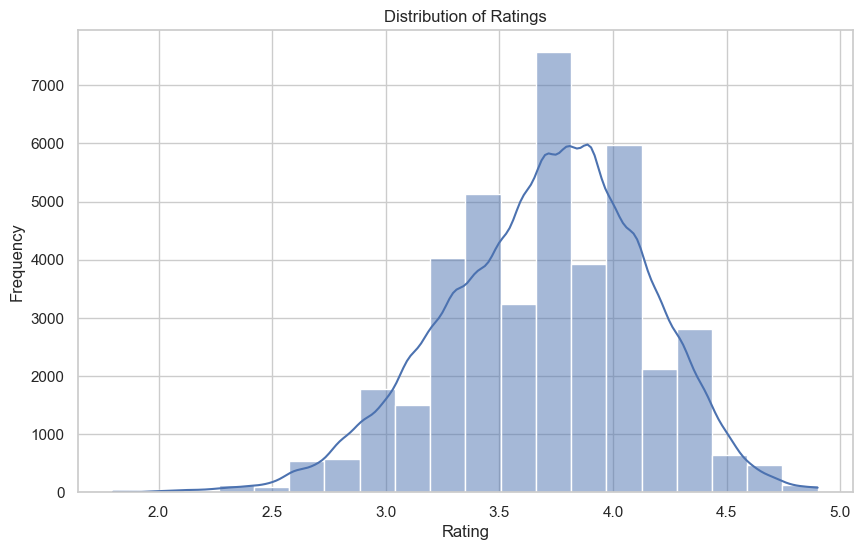

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()




## Business Insights from Rating Distribution

- **Customer Satisfaction**:
  - Majority of ratings between 3.0 and 4.5 indicate general customer satisfaction.
  - Significant ratings below 3.5 suggest areas for improvement.

- **Market Differentiation**:
  - High ratings (>4.5) are rare, presenting an opportunity to promote premium listings.
  - Middle-tier restaurants can be targeted for quality improvement initiatives.

- **Targeted Marketing and Promotions**:
  - Focus on improving restaurants with ratings below 3.0 to enhance customer satisfaction.
  - Leverage high-rated restaurants in marketing campaigns to attract and retain customers.

- **Customer Trust and Platform Credibility**:
  - Diverse range of ratings (2.0 to 5.0) enhances platform credibility and customer trust.


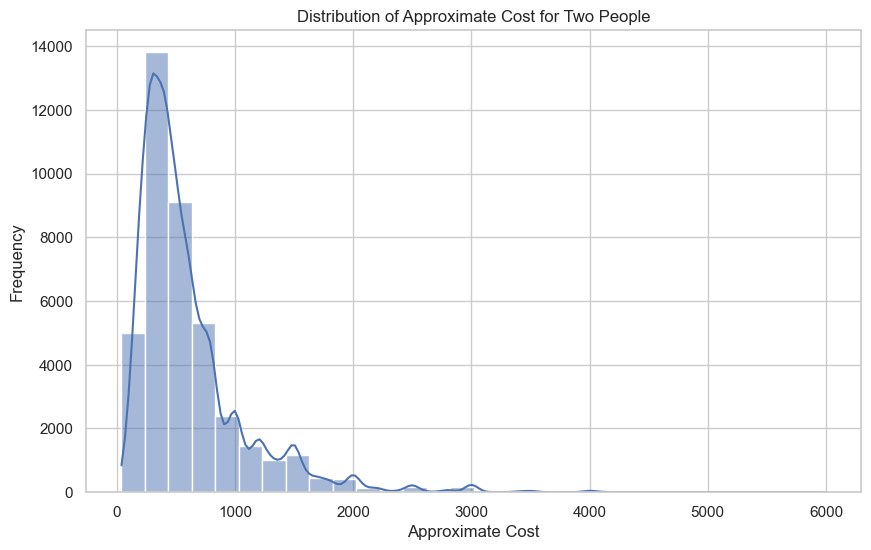

In [22]:
# 2. Distribution of approximate cost
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=30, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.show()





## Business Insights from Distribution of Approximate Cost for Two People

- **Customer Affordability**:
  - Majority of customers prefer restaurants with costs around ₹500-₹1000.
  - Focus on promoting budget-friendly restaurants to attract more users.

- **Market Segmentation**:
  - Significant drop in frequency beyond ₹1000 indicating a smaller market for premium dining.
  - Create distinct marketing strategies for budget-conscious versus premium customers.

- **Pricing Strategy**:
  - Advise restaurants to consider competitive pricing within the ₹500-₹1000 range.
  - Higher-end restaurants should emphasize value-added services or exclusive experiences.

- **Service Expansion**:
  - Explore partnerships with restaurants in the most popular price range.
  - Offer personalized dining experiences or exclusive deals for higher-end restaurants.

These insights can help Zomato refine its business strategies to cater to a broader audience while maximizing profitability.

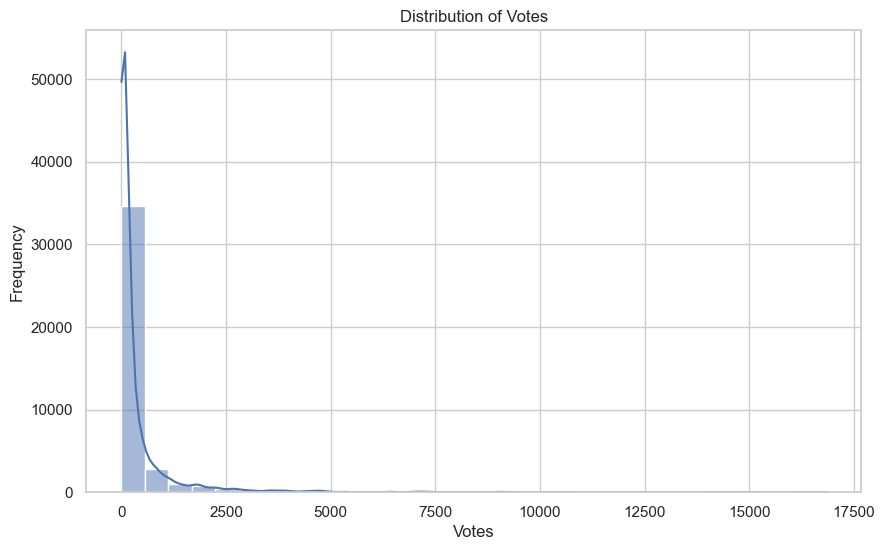

In [23]:
# 3. Distribution of votes
plt.figure(figsize=(10, 6))
sns.histplot(df['votes'], bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()



## Distribution of Votes

- **Highly Skewed Distribution:** 
  - The distribution of votes is highly skewed to the right, with the majority of restaurants receiving a low number of votes.
  - A small number of restaurants have received a significantly higher number of votes, indicating that only a few are highly popular.

- **Focus on Popular Restaurants:**
  - Zomato could consider focusing marketing efforts on these highly popular restaurants to maximize visibility and customer engagement.

- **Potential for New Entrants:**
  - There is an opportunity for new or lesser-known restaurants to attract more votes and gain popularity through targeted promotions and customer incentives.

- **Customer Engagement Strategies:**
  - Implementing strategies to increase customer engagement, such as loyalty programs, discounts, or special events, could help underrepresented restaurants gain more votes and visibility.

- **Quality vs. Quantity:**
  - High vote counts might correlate with quality or popularity; Zomato could analyze further to understand if high-vote restaurants also maintain higher ratings.



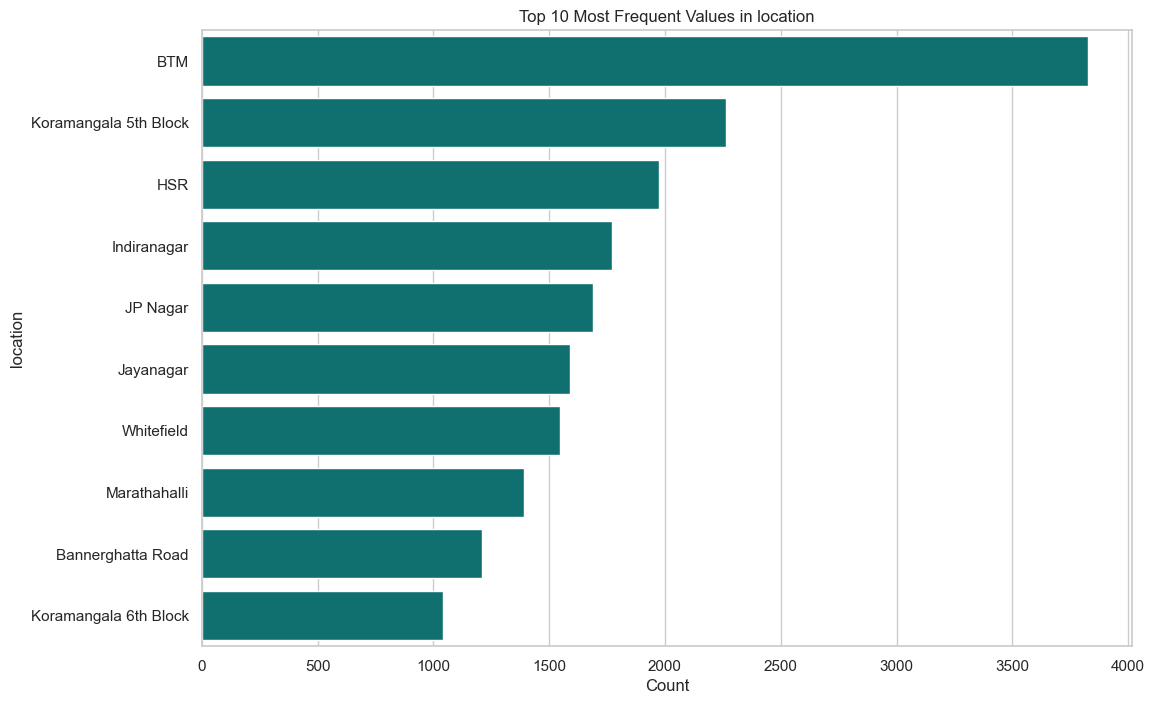

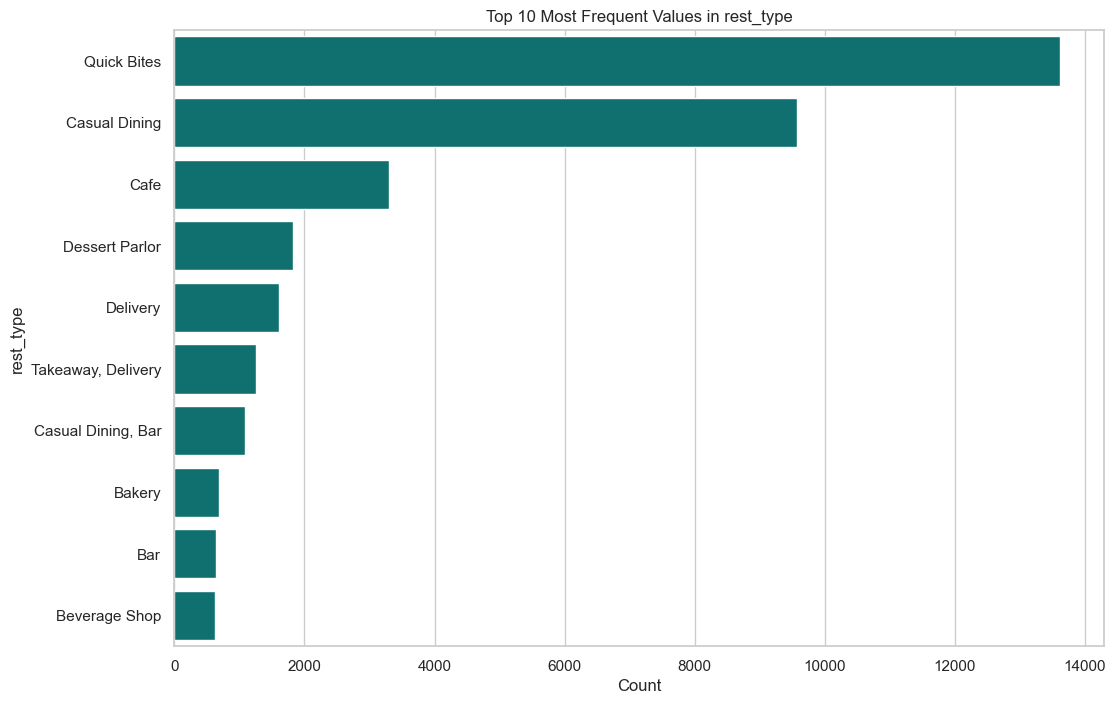

In [26]:
# 4. Define a function to plot top N categories
def plot_top_categories(df, column, top_n=10):
    top_categories = df[column].value_counts().head(top_n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_categories.index, x=top_categories.values, color="teal")
    plt.title(f'Top {top_n} Most Frequent Values in {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()
    
 # Plot for 'location' and 'rest_type'
plot_top_categories(df, 'location', top_n=10)
plot_top_categories(df, 'rest_type', top_n=10)

### Business Insights from the Most Frequent Locations for Zomato Bangalore Dataset

- **Dominance in BTM:** BTM has the highest number of restaurants, indicating it is a crucial area for customer acquisition and revenue generation for Zomato.

- **Strategic Importance of Koramangala:** Both Koramangala 5th and 6th Block appear in the top locations, highlighting Koramangala as a vital market for Zomato with a strong dining culture.

- **Key Market Areas:** Locations like HSR, Indiranagar, and JP Nagar are also significant, showing the distribution of high-traffic dining areas that Zomato should focus on.

- **Opportunities for Expansion:** While the top locations are saturated, Zomato can explore underrepresented areas to increase market coverage and customer base.

- **Resource Allocation:** These insights suggest that Zomato should allocate more resources, such as delivery fleet and marketing, to these high-demand areas to maximize efficiency and customer satisfaction.

- **Partnership and Promotion:** Zomato can target these top locations for strategic partnerships with popular restaurants and aggressive marketing campaigns to strengthen its brand presence.


### Business Insights from the Most Frequent Restaurant Types for Zomato Bangalore Dataset

- **Popularity of Quick Bites:** The highest frequency of "Quick Bites" suggests a strong consumer preference for fast and convenient dining options. Zomato should focus on partnering with more quick-service restaurants.

- **Casual Dining Demand:** "Casual Dining" is also prominent, indicating a significant market for relaxed, sit-down meals. Zomato can leverage this by offering promotions and discounts for casual dining experiences.

- **Growth in Cafes:** The popularity of "Cafes" suggests a growing trend for casual, social dining spaces. Zomato could explore curated cafe experiences or loyalty programs to attract more customers.

- **Diverse Dining Preferences:** The presence of "Dessert Parlors" and "Bakeries" in the top list highlights niche markets that cater to specific dining preferences, which Zomato can target with specialized marketing campaigns.

- **Potential in Delivery:** The frequency of "Delivery" and "Takeaway, Delivery" options emphasizes the importance of the delivery segment. Zomato should continue to innovate in delivery logistics and user experience to capture this market.

- **Opportunities in Beverage Shops:** Although less frequent, "Beverage Shops" represent a growing segment. Zomato could capitalize on this by promoting beverage deals or collaborations with popular beverage brands.

- **Strategic Expansion:** The varied restaurant types suggest diverse customer demands. Zomato should consider expanding its partnerships with different types of eateries to cover a broader range of dining preferences.



Bivariate and Multivariate Analysis:

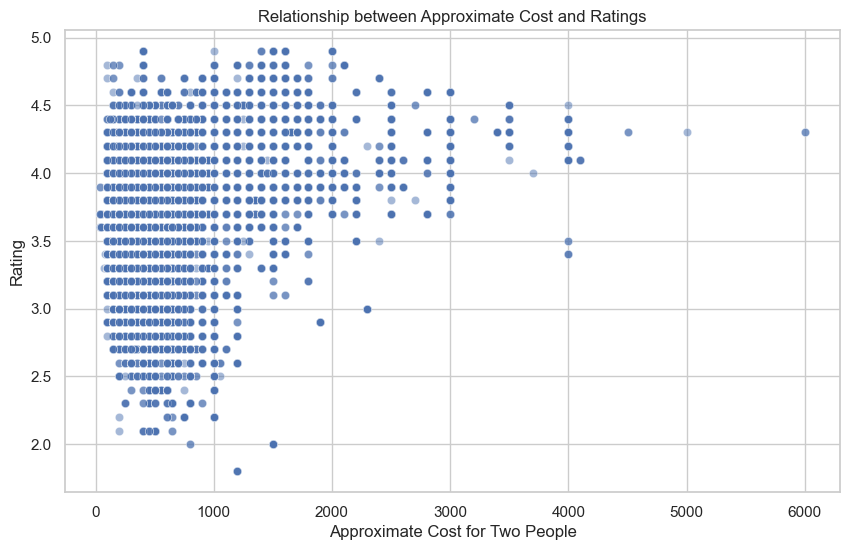

In [27]:
# 1. Relationship between Ratings and Approximate Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.5)
plt.title('Relationship between Approximate Cost and Ratings')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Rating')
plt.show()



### Business Insights from the Relationship between Approximate Cost and Ratings for Zomato Bangalore Dataset

- **High Ratings at Lower Costs:** Most restaurants with lower costs (around ₹500-₹1000 for two people) tend to have high ratings (4.0 and above). This suggests that customers are finding value for money in these budget-friendly options, which Zomato can promote as affordable yet high-quality dining experiences.

- **Luxury Segment Trends:** Restaurants with higher costs (₹2000 and above) generally maintain ratings between 3.5 and 4.5. Zomato could target premium customers by highlighting these high-cost, high-rated restaurants in their marketing campaigns.

- **Price Sensitivity:** The dispersion of ratings across different price points indicates a diverse customer base with varying price sensitivity. Zomato can create segmented marketing strategies to cater to both cost-sensitive customers and those willing to pay more for premium experiences.

- **Potential for Improvement:** Some higher-cost restaurants (₹3000+) have ratings below 4.0, indicating potential areas for improvement. Zomato could work with these restaurants to enhance their offerings or customer service, aiming to boost their ratings.

- **Focus on Popular Segments:** Since most data points cluster around lower price points with high ratings, Zomato should focus on expanding its partnerships with restaurants in this segment while ensuring quality remains consistent.



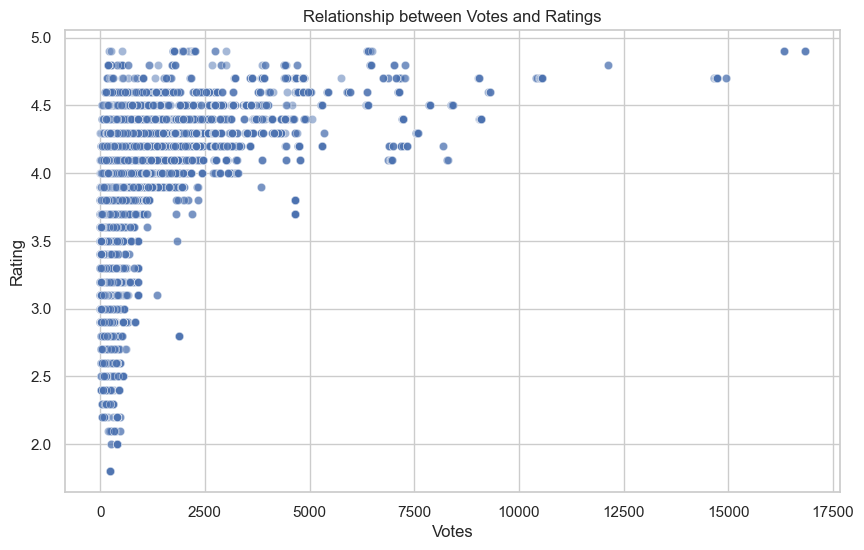

In [28]:
# 2. Relationship between Ratings and Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.5)
plt.title('Relationship between Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()



## Relationship between Votes and Ratings

1. **High Ratings with Fewer Votes**:
   - A large number of restaurants have high ratings (4.0 and above) but relatively low votes (under 2,500).
   - Indicates potential high-quality niche restaurants that are well-regarded by customers but not widely known or visited.

2. **Concentration Around 4.0 Rating**:
   - A significant number of restaurants cluster around the 4.0 rating mark with varying votes.
   - Suggests a general trend where most restaurants maintain a good standard but need more exposure to increase votes.

3. **Low Ratings and Low Votes**:
   - Restaurants with ratings below 3.5 tend to have very few votes.
   - Indicates lower popularity and potentially lower quality, which may require targeted improvements or promotions.

4. **High Votes with High Ratings**:
   - A small group of restaurants with high votes (above 5,000) also have high ratings (4.5 and above).
   - These are likely the top performers, potentially driving the most traffic on the platform and deserving of special attention or partnerships.

5. **Opportunity for Growth**:
   - Restaurants with decent ratings but fewer votes can be targeted for promotional campaigns to increase visibility and customer engagement.

6. **Outliers with Very High Votes**:
   - A few restaurants have exceptionally high votes (above 10,000) and ratings.
   - These outliers represent success stories that can be studied and used as case studies for best practices.



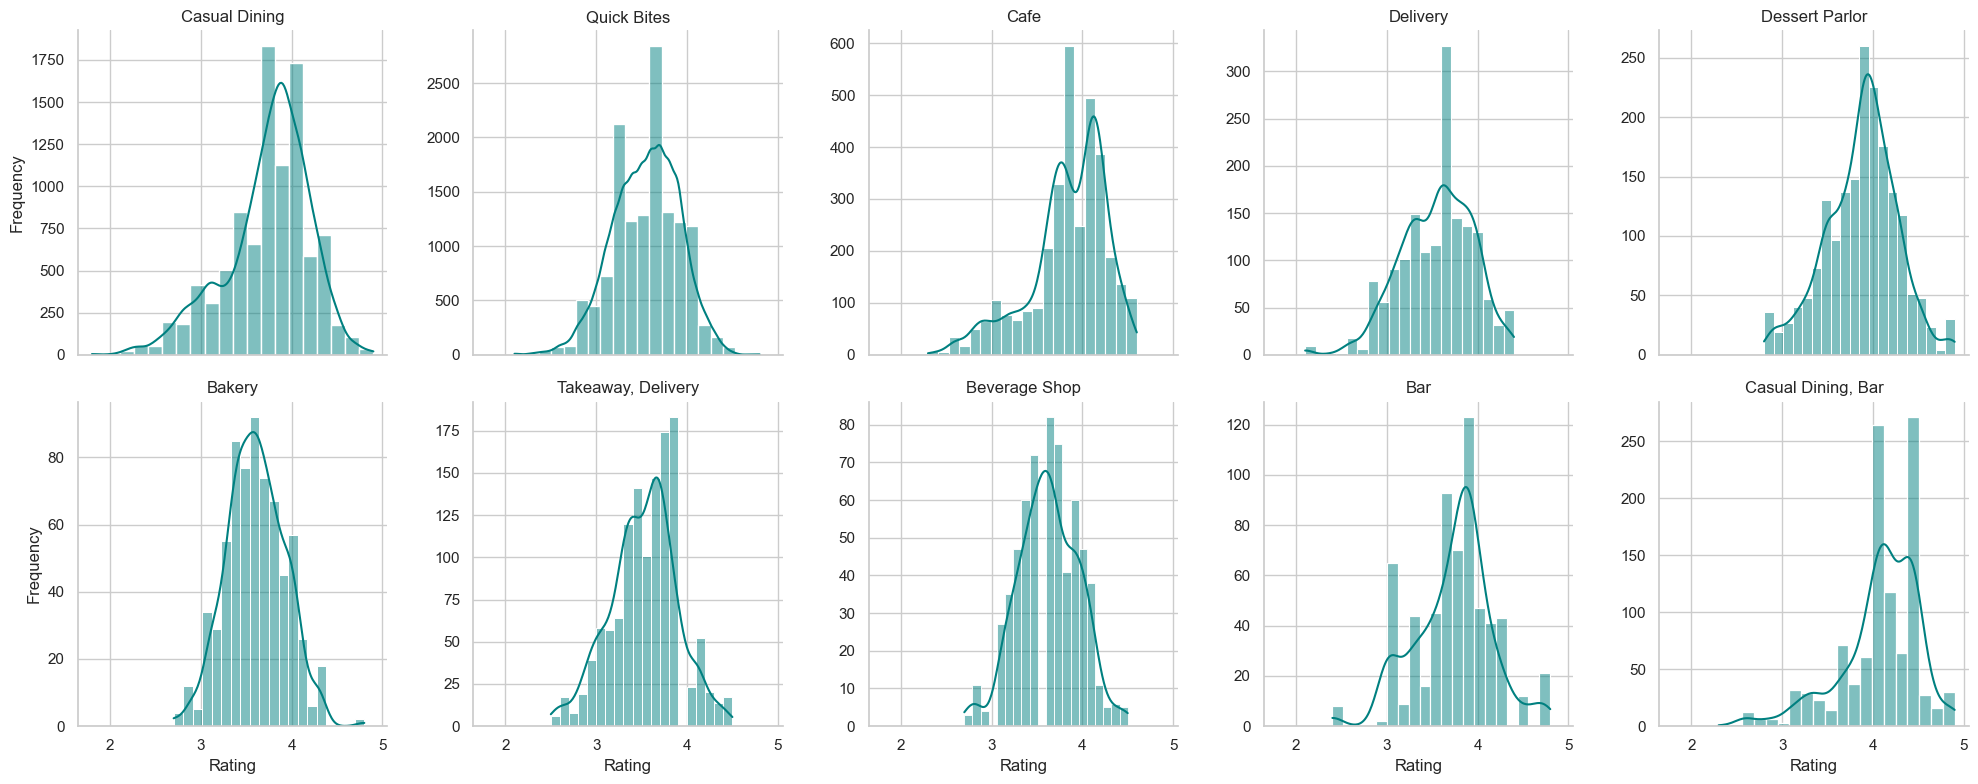

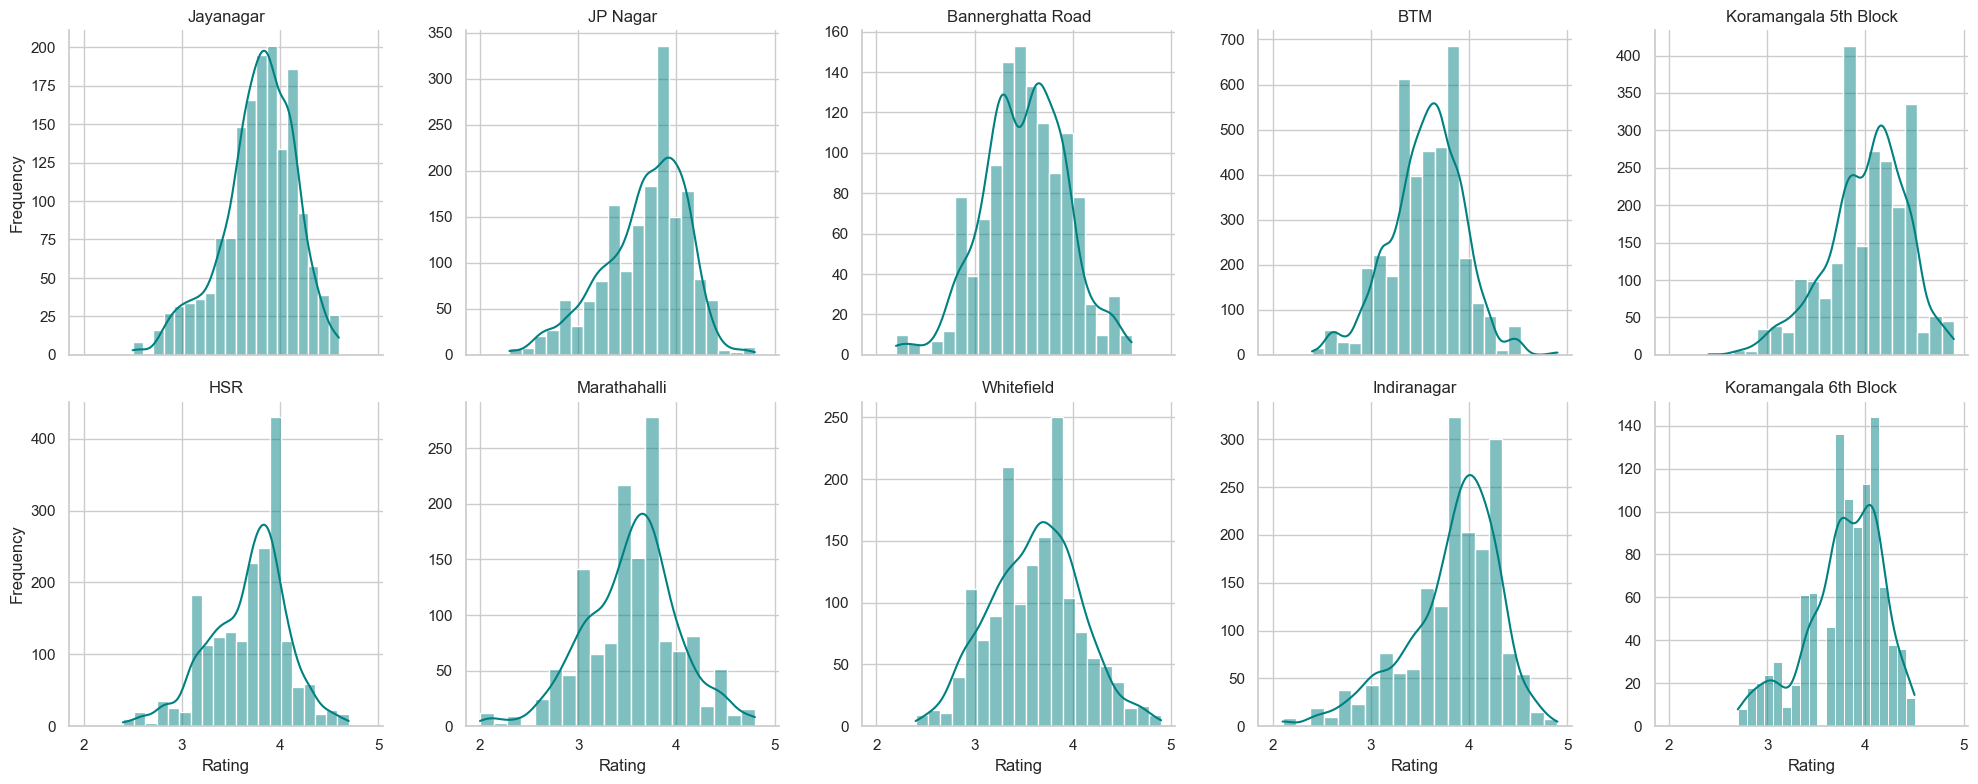

In [29]:
# Define a function to plot facet grids for top N categories
def plot_rating_facetgrid(df, column, top_n=10):
    top_categories = df[column].value_counts().head(top_n).index
    filtered_df = df[df[column].isin(top_categories)]
    
    g = sns.FacetGrid(filtered_df, col=column, col_wrap=5, height=4, sharey=False)
    g.map(sns.histplot, 'rate', bins=20, kde=True, color='teal')
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("Rating", "Frequency")
    plt.show()

# Plot for 'rest_type' and 'location'
plot_rating_facetgrid(df, 'rest_type', top_n=10)
plot_rating_facetgrid(df, 'location', top_n=10)


## Distribution of Ratings Across Different Restaurant Types

### 1. Casual Dining
- **Rating Concentration**: Most ratings are concentrated between 3.5 and 4.5.
- **High Frequency**: A high number of casual dining establishments have average ratings around 4.0, indicating consistent quality but potential room for differentiation.

### 2. Quick Bites
- **Narrow Rating Distribution**: The majority of ratings are tightly clustered around 3.0 to 4.0.
- **Market Saturation**: This suggests a highly competitive market where most places offer similar quality.

### 3. Cafe
- **Wide Rating Spread**: Ratings range broadly from 2.5 to 4.5, indicating variable quality across different cafes.
- **Improvement Opportunities**: There are opportunities to standardize or improve the lower-rated cafes.

### 4. Delivery
- **Mid-Range Ratings**: Ratings predominantly fall between 3.0 and 4.0.
- **Customer Satisfaction**: Consistent but not exceptional, highlighting the need for improved service or quality in delivery options.

### 5. Dessert Parlor
- **High Ratings**: Most dessert parlors have ratings concentrated around 4.0.
- **Niche Market**: Generally well-received by customers, indicating a positive market perception.

### 6. Bakery
- **Tightly Clustered Ratings**: Ratings are centered around 3.5 to 4.0, with few outliers.
- **Stable Quality**: Bakers maintain consistent quality, but there might be a need for innovation to stand out.

### 7. Takeaway, Delivery
- **Rating Peak at 4.0**: Similar to delivery, with a concentration around 4.0.
- **Dependable Choice**: These services are reliable but could explore ways to exceed customer expectations.

### 8. Beverage Shop
- **Lower Frequency and Ratings**: Ratings are generally lower and more spread out, suggesting mixed customer experiences.
- **Potential for Improvement**: The beverage market could benefit from enhanced offerings or customer service.

### 9. Bar
- **Rating Variation**: Significant variation, with ratings ranging from 2.5 to 4.5.
- **Diverse Quality**: Bars offer diverse experiences, from exceptional to mediocre, indicating a wide range of customer expectations and experiences.

### 10. Casual Dining, Bar
- **High Ratings**: Many establishments in this category are rated between 4.0 and 4.5.
- **Premium Experience**: Combining casual dining with bar services generally results in higher customer satisfaction, possibly due to the more comprehensive experience offered.



## Distribution of Ratings Across Different Locations

### 1. Jayanagar
- **High Rating Density**: Most restaurants are rated between 3.5 and 4.5, indicating a generally high standard of dining options.
- **Consistent Quality**: Jayanagar appears to offer a consistently good dining experience, with few outliers.

### 2. JP Nagar
- **Rating Concentration**: Similar to Jayanagar, with most ratings clustering around 3.5 to 4.0.
- **Moderate Competition**: The concentration suggests competition is centered around maintaining a standard quality level.

### 3. Bannerghatta Road
- **Wider Rating Distribution**: Ratings vary more, ranging from 2.5 to 4.5.
- **Diverse Quality**: There is a mix of both high and low-quality restaurants, offering opportunities to improve lower-rated establishments.

### 4. BTM
- **High Frequency in Mid-Range Ratings**: A large number of restaurants are clustered around the 4.0 rating.
- **Strong Market Presence**: BTM is a strong market with many restaurants offering good quality, with opportunities for premium offerings.

### 5. Koramangala 5th Block
- **Peak at 4.0**: Ratings are centered around 4.0, with some establishments achieving higher ratings.
- **Well-Established Area**: Koramangala 5th Block seems to have well-established restaurants with stable customer satisfaction.

### 6. HSR
- **Highly Skewed Distribution**: The majority of ratings are concentrated between 3.5 and 4.0.
- **Consistent Quality**: HSR maintains consistent quality across its restaurants, though it may lack standouts.

### 7. Marathahalli
- **Moderate to High Ratings**: Restaurants generally have ratings between 3.5 and 4.0.
- **Stable Market**: Marathahalli offers a stable dining scene with opportunities to push for higher ratings.

### 8. Whitefield
- **Broader Rating Spread**: Ratings vary widely, from 2.5 to 4.5, with a significant concentration around 4.0.
- **Opportunities for Growth**: There is potential to improve the lower-rated restaurants to match the higher-rated ones.

### 9. Indiranagar
- **Mid to High Ratings**: Most restaurants fall between 3.5 and 4.5, with a peak around 4.0.
- **High-End Market**: Indiranagar is a competitive, high-end market with generally positive customer feedback.

### 10. Koramangala 6th Block
- **High Rating Concentration**: Similar to Koramangala 5th Block, with a concentration around 4.0.
- **Customer Satisfaction**: Restaurants in this area generally receive high ratings, indicating a high level of customer satisfaction.



Correlation Analysis

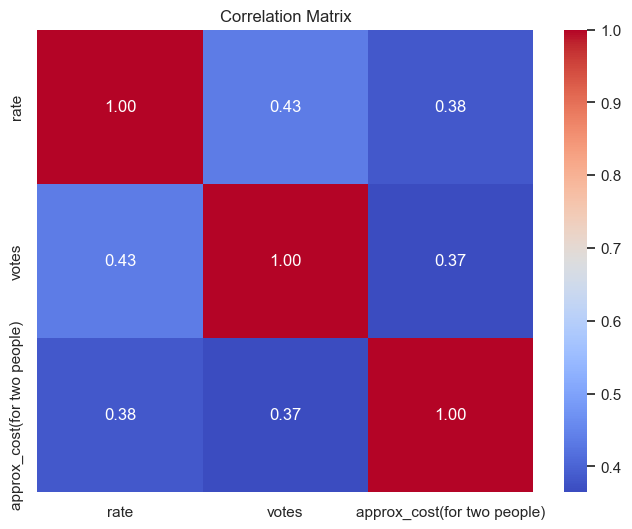

In [19]:
# Calculate the correlation matrix
corr_matrix = df[['rate', 'votes', 'approx_cost(for two people)']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Insights from the Correlation Matrix:

* **Strong Positive Correlation between Ratings and Votes:** Restaurants with higher ratings tend to have more votes, suggesting that customer satisfaction is a key driver of popularity.
* **Moderate Positive Correlation between Ratings and Approximate Cost:** Restaurants with higher ratings might have slightly higher prices, indicating that customers are willing to pay more for quality.
* **Weak Positive Correlation between Votes and Approximate Cost:** There's a slight positive relationship between the number of votes and the approximate cost, suggesting that more popular restaurants might charge slightly higher prices.

**Implications for Zomato:**

* **Prioritize customer satisfaction:** Focus on improving restaurant quality and service to attract more votes and positive reviews.
* **Consider pricing strategies:** Analyze the relationship between pricing and popularity to determine optimal pricing strategies for different types of restaurants.
* **Leverage customer feedback:** Use ratings and reviews to identify areas for improvement and provide recommendations to restaurants.

Analysis of Popular Cuisines

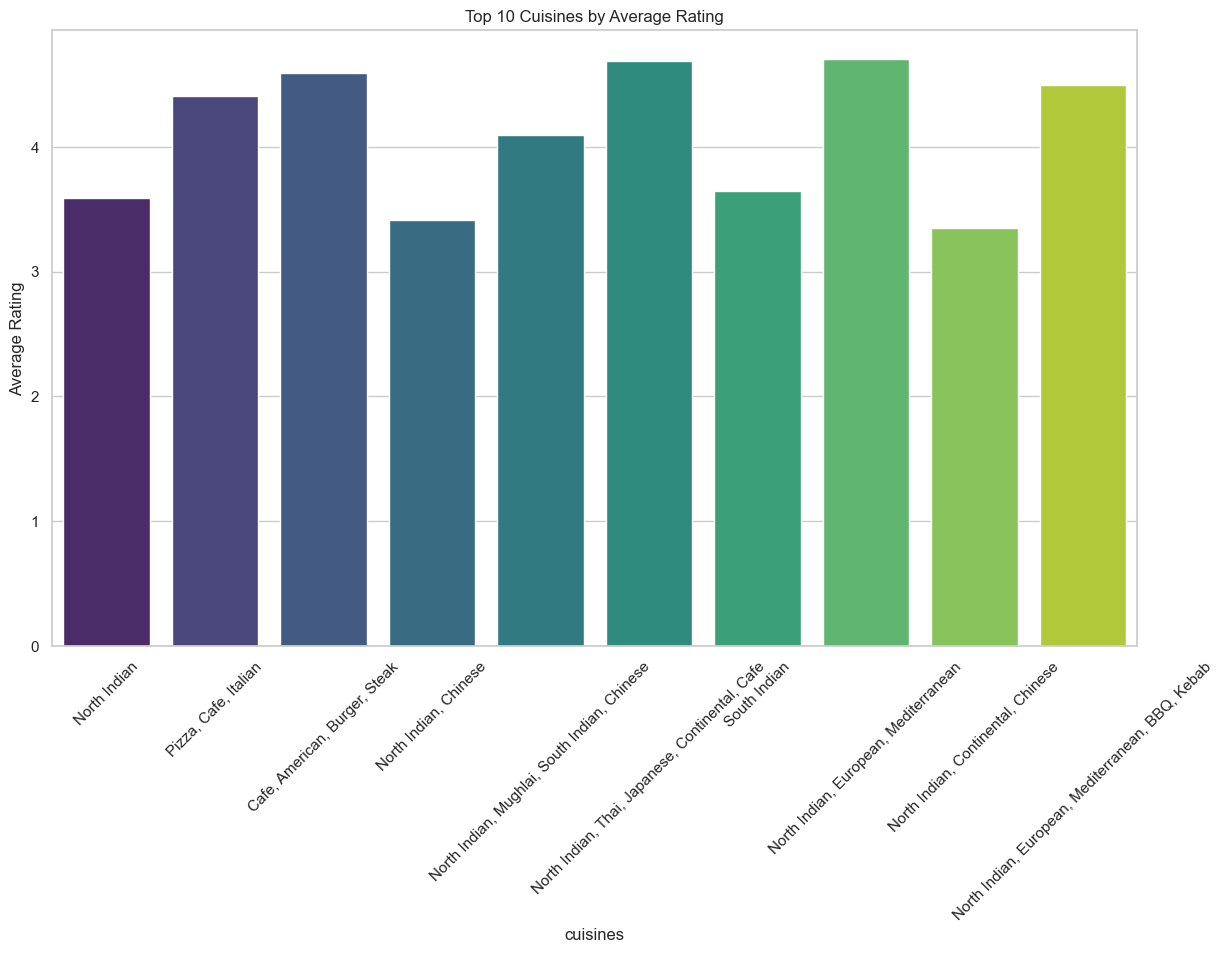

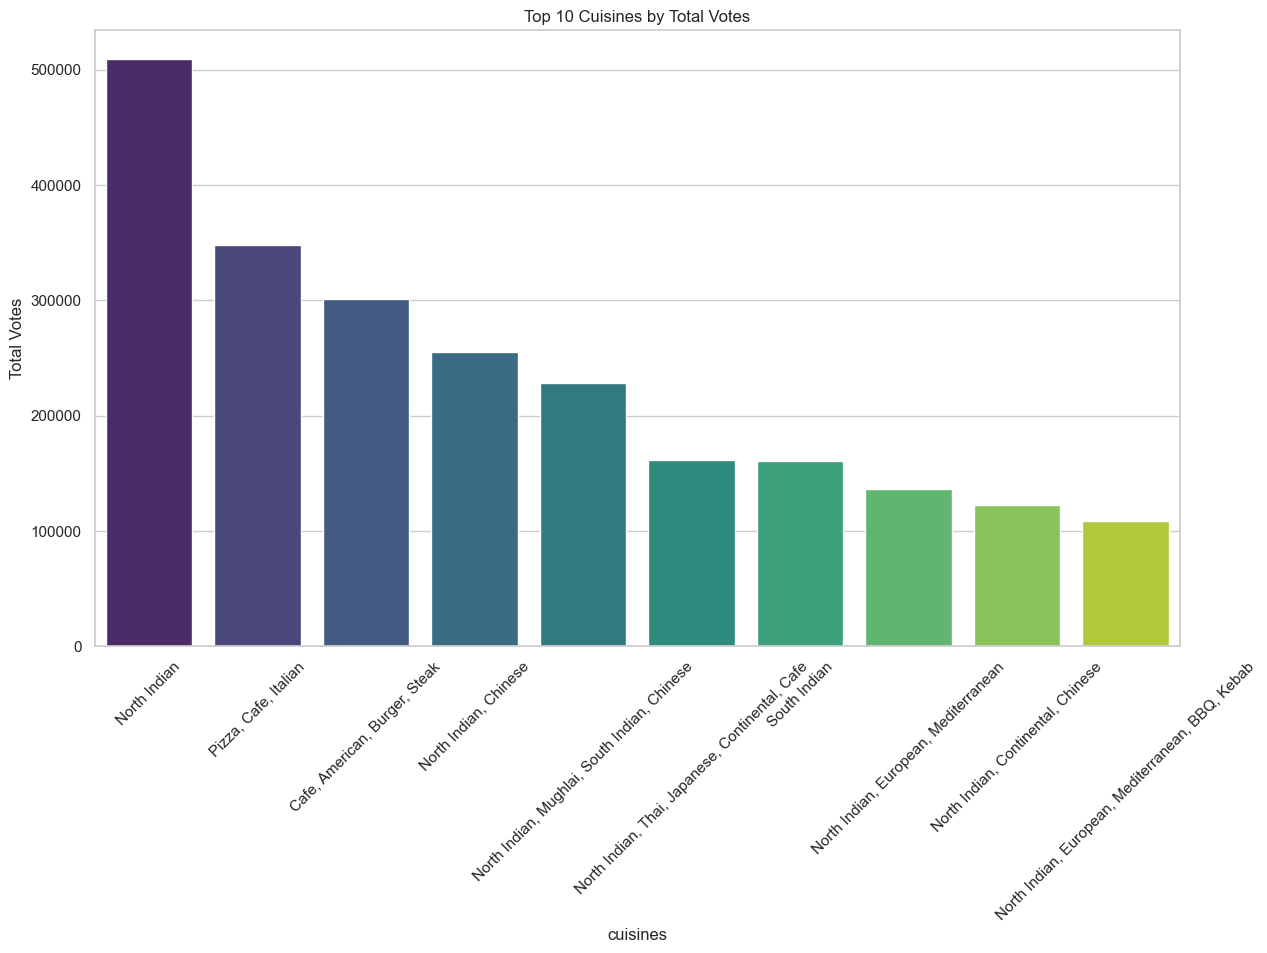

In [32]:
# Directly explode the cuisines column to separate multiple cuisines into individual rows
df_exploded = df.explode('cuisines')

# Calculate the average rating and total votes for each cuisine
cuisine_analysis = df_exploded.groupby('cuisines').agg({'rate': 'mean', 'votes': 'sum'}).sort_values(by='votes', ascending=False).head(10)

# Plotting the results
plt.figure(figsize=(14, 8))
sns.barplot(x=cuisine_analysis.index, y=cuisine_analysis['rate'], palette="viridis", hue=cuisine_analysis.index)
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=cuisine_analysis.index, y=cuisine_analysis['votes'], palette="viridis", hue=cuisine_analysis.index)
plt.title('Top 10 Cuisines by Total Votes')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()


**Cuisines by average rating**

Popular Cuisine Types: The cuisines listed, such as North Indian, Chinese, Continental, Italian, and Café, are among the top-rated in Bangalore, indicating their popularity and quality in terms of customer satisfaction.

High Ratings: Most of these cuisines have average ratings close to or above 4, suggesting that restaurants offering these cuisines generally maintain a high standard of food quality and customer service.

Variety in Preferences: The presence of both international (e.g., Italian, American) and local (e.g., North Indian) cuisines in the top 10 indicates a diverse culinary preference among the customers in Bangalore.

**Cuisines by total votes**

Most Popular Cuisines: North Indian cuisine has received the highest number of votes, followed by Chinese and Continental. This indicates that these cuisines are extremely popular among customers in Bangalore.

High Engagement: The total votes for these cuisines suggest that they are not only popular but also actively reviewed by customers, which could imply high customer engagement.

Comparison with Ratings: When compared with the previous chart showing average ratings, it can be seen that some cuisines like North Indian and Continental appear in both charts, signifying that they are both highly rated and widely reviewed. However, some cuisines with high ratings may not have as many votes, indicating they might be niche but well-appreciated.

Diverse Preferences: The presence of both local (North Indian) and international (Italian, Continental, American) cuisines in the top 10 suggests that the customer base in Bangalore enjoys a variety of culinary styles